### Calculating and Comparing Rates of Return in Python


In [1]:
# dealing with multiple assets over the same timeframe
#Simple Rate of return=(ending price-beginning price)/beginning price
##
#making calculations about a single asset over time
#Logarithmic rate of return= log(ending price/beginning price)=log ending price - log beginning price
##
##Establishing a timeframe is crucial

#annual return=[(daily return+1)^365]*100
#
#Historical vs Expected Rates of return(reasonable proxy)


In [8]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [9]:
PG = wb.DataReader('PG', data_source='yahoo', start='1995-1-1')

In [10]:
PG.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.166473
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.101009
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.986450
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.002816
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.970086


In [11]:
PG.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-03-18,129.039993,127.040001,128.210007,128.699997,6866200.0,128.699997
2021-03-19,129.740005,127.900002,129.100006,128.009995,20034500.0,128.009995
2021-03-22,130.889999,128.009995,128.009995,130.179993,8077600.0,130.179993
2021-03-23,133.289993,129.990005,130.410004,132.600006,9503800.0,132.600006
2021-03-24,133.139999,130.619995,130.940002,132.559998,8316900.0,132.559998


### Simple Rate of Return

In [15]:
#difference between stock price day 1 minus the price on day 0
#price= adj close price

#(P1/P0)-1

PG['simple_return'] = (PG['Adj Close'] / PG['Adj Close'].shift(1)) - 1
print(PG['simple_return'])


#NaN-not a number

Date
1995-01-03         NaN
1995-01-04   -0.008016
1995-01-05   -0.014141
1995-01-06    0.002049
1995-01-09   -0.004090
                ...   
2021-03-18    0.002180
2021-03-19   -0.005361
2021-03-22    0.016952
2021-03-23    0.018590
2021-03-24   -0.000302
Name: simple_return, Length: 6603, dtype: float64


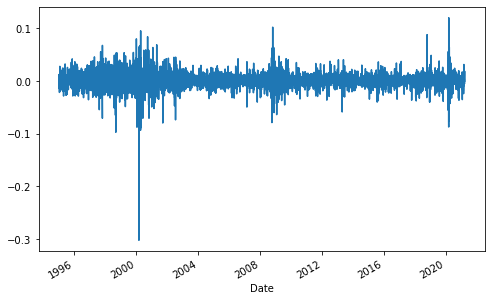

In [17]:
PG['simple_return'].plot(figsize=(8,5))
plt.show()

In [19]:
avg_returns_d = PG['simple_return'].mean()
avg_returns_d

0.0005242628505469326

In [20]:
avg_returns_a = PG['simple_return'].mean() * 250
avg_returns_a

0.13106571263673317

In [22]:
print(str(round(avg_returns_a, 5) * 100) + ' %')


13.107 %


### Log Returns

In [23]:
#ln(Pt/Pt-1)

PG.head()

,High,Low,Open,Close,Volume,Adj Close,simple_return
Date,,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,8.166473,NaN
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,8.101009,-0.008016
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,7.986450,-0.014141
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,8.002816,0.002049
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,7.970086,-0.004090


In [25]:
PG['log_return'] = np.log(PG['Adj Close'] / PG['Adj Close'].shift(1))
print(PG['log_return'])

Date
1995-01-03         NaN
1995-01-04   -0.008048
1995-01-05   -0.014242
1995-01-06    0.002047
1995-01-09   -0.004098
                ...   
2021-03-18    0.002178
2021-03-19   -0.005376
2021-03-22    0.016810
2021-03-23    0.018419
2021-03-24   -0.000302
Name: log_return, Length: 6603, dtype: float64


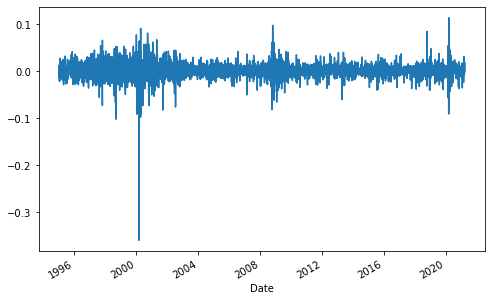

In [26]:
PG['log_return'].plot(figsize=(8,5))
plt.show()

In [27]:
log_return_d = PG['log_return'].mean()
log_return_d

0.00042214453086817153

In [28]:
log_return_a = PG['log_return'].mean()
log_return_a

0.00042214453086817153

### The Rate of Return of a portfolio

In [30]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [32]:
tickers = ['PG','MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']
    

In [33]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6603 entries, 1995-01-03 to 2021-03-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6603 non-null   float64
 1   MSFT    6603 non-null   float64
 2   F       6603 non-null   float64
 3   GE      6603 non-null   float64
dtypes: float64(4)
memory usage: 257.9 KB


In [34]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,8.166473,2.389259,4.380183,4.119593
1995-01-04,8.101009,2.406627,4.498034,4.119593
1995-01-05,7.986450,2.366929,4.458752,4.129690
1995-01-06,8.002816,2.406627,4.458752,4.109495
1995-01-09,7.970086,2.391740,4.537320,4.069108


In [35]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2021-03-18,128.699997,230.720001,12.49,13.25
2021-03-19,128.009995,230.350006,12.83,13.22
2021-03-22,130.179993,235.990005,12.85,13.13
2021-03-23,132.600006,237.580002,12.21,12.66
2021-03-24,132.559998,235.460007,12.14,12.50


### Normalisation to 100

In [36]:
#Pt/P0*100
mydata.iloc[0]

#it helps to normalise the data to 100
#the iloc indexer extracts the data from the 1st column of the table


PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

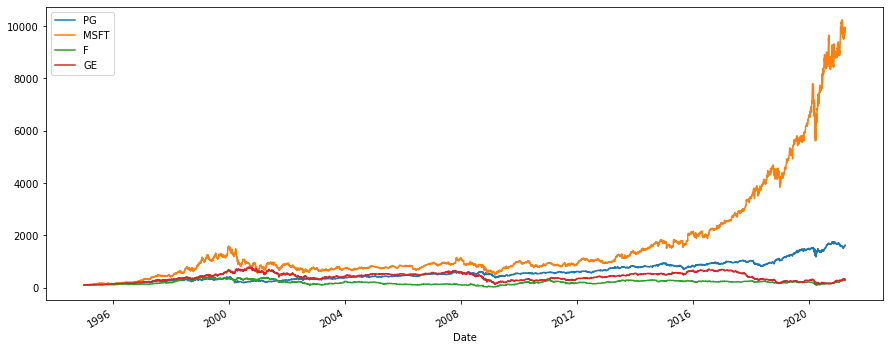

In [37]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));
plt.show()

In [38]:
mydata.loc['1995-01-03']

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

In [39]:
mydata.iloc[0]

PG      8.166473
MSFT    2.389259
F       4.380183
GE      4.119593
Name: 1995-01-03 00:00:00, dtype: float64

### Calculating the Return of a Portfolio of Securities

In [40]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026905,0.000000
1995-01-05,-0.014141,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016772,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017621,-0.009828


In [41]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [43]:
np.dot(returns, weights)
#np.dot() calculates vactor or matrix products

array([        nan,  0.00653957, -0.00922966, ...,  0.00904682,
       -0.01506852, -0.00689905])

In [44]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.131066
MSFT    0.223679
F       0.118281
GE      0.093659
dtype: float64

In [45]:
np.dot(annual_returns, weights)

0.14167099628651006

In [46]:
pfolio_1 = str(round(np.dot(annual_returns,weights), 5)*100) + '%'
print(pfolio_1)

14.167%


In [48]:
#comparing this combination with the performance of the another 
#portfolio-> assign new weights of each stock 

weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [50]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) *100) + '%'
print(pfolio_1)
print(pfolio_2)

14.167%
16.432%


In [51]:
#market index
#good proxy for the development of the market

### Calculating the Return of Indices

In [52]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt


In [59]:
tickers = ['^GSPC', '^IXIC', '^GDAXI']

ind_data = pd.DataFrame()

for t in tickers:
    ind_data[t] = wb.DataReader(t, data_source='yahoo', start='1997-1-1')['Adj Close']

In [60]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [61]:
ind_data.head()

,^GSPC,^IXIC,^GDAXI
Date,,,
1997-01-02,737.010010,1280.699951,2820.810059
1997-01-03,748.030029,1310.680054,2863.260010
1997-01-06,747.650024,1316.400024,2890.199951
1997-01-07,753.229980,1327.729980,2876.340088
1997-01-08,748.409973,1320.349976,2904.080078


In [62]:
ind_data.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-03-18,3915.459961,13116.169922,14775.519531
2021-03-19,3913.100098,13215.240234,14621.000000
2021-03-22,3940.590088,13377.540039,14657.209961
2021-03-23,3910.520020,13227.700195,14662.019531
2021-03-24,3889.139893,12961.889648,14610.389648


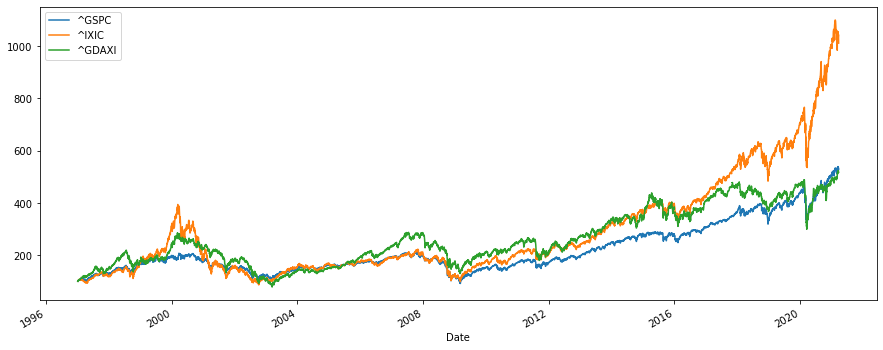

In [63]:
(ind_data / ind_data.iloc[0] * 100).plot(figsize=(15,6));
plt.show()

In [64]:
ind_returns = (ind_data / ind_data.shift(1)) - 1
ind_returns.tail()

,^GSPC,^IXIC,^GDAXI
Date,,,
2021-03-18,-0.014761,-0.030242,0.012257
2021-03-19,-0.000603,0.007553,-0.010458
2021-03-22,0.007025,0.012281,0.002477
2021-03-23,-0.007631,-0.011201,0.000328
2021-03-24,-0.005467,-0.020095,-0.003521


In [65]:
annual_ind_returns = ind_returns.mean() * 250
annual_ind_returns

^GSPC     0.087580
^IXIC     0.126677
^GDAXI    0.080573
dtype: float64

In [69]:
tickers = ['PG', '^GSPC', '^DJI']

data_2 = pd.DataFrame()

for t in tickers:
    data_2 = pd.DataFrame()
for t in tickers:
    data_2[t] = wb.DataReader(t, data_source='yahoo', start='2007-1-1')['Adj Close']

In [70]:
data_2.tail()

,PG,^GSPC,^DJI
Date,,,
2021-03-18,128.699997,3915.459961,32862.300781
2021-03-19,128.009995,3913.100098,32627.970703
2021-03-22,130.179993,3940.590088,32731.199219
2021-03-23,132.600006,3910.520020,32423.150391
2021-03-24,132.559998,3889.139893,32420.060547


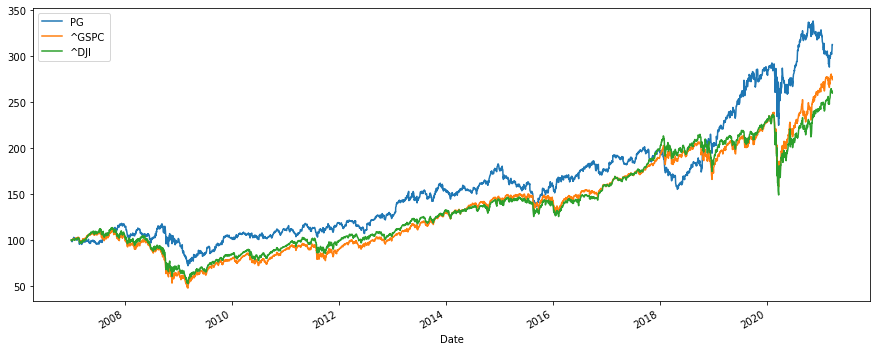

In [71]:
(data_2 / data_2.iloc[0] * 100).plot(figsize=(15,6));
plt.show()